In [13]:
import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np

from torch.utils.tensorboard import SummaryWriter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
train_data = torchvision.datasets.MNIST(
    root= "/data/DataSet/",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=(0.5),
            std=(0.5)
        )
    ])
)

test_data = torchvision.datasets.MNIST(
    root= "/data/DataSet/",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=(0.5),
            std=(0.5)
        )
    ])
)

batch_size = 32

train_loader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
)

In [15]:
for img, label in train_loader:
    print(f"Image: {img.size()}, Type: {img.type()}")
    print(f"Label: {label.size()}, Type: {img.type()}")
    break

Image: torch.Size([32, 1, 28, 28]), Type: torch.FloatTensor
Label: torch.Size([32]), Type: torch.FloatTensor


In [16]:
torchvision.datasets.CIFAR10(
    root= "/data/DataSet/CIFAR10",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=(0.5, 0.5, 0.5),
            std=(0.5, 0.5, 0.5)
        )
    ])
)

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /data/DataSet/CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [17]:
# CIFAL10 -> [data][Tuple([3][32][32])(label)]
# MNIST -> [data][Tuple([1][28][28])(label)]
temp = train_data.class_to_idx
labels_map = dict(zip(temp.values(), temp.keys()))

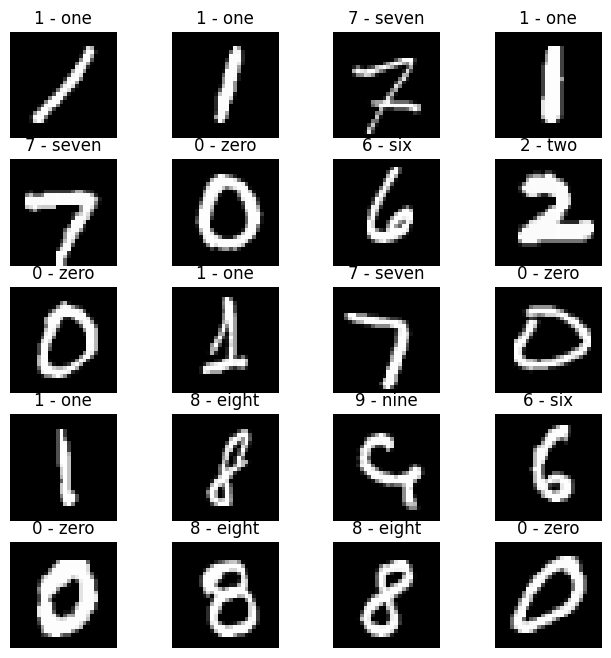

In [18]:
fig = plt.figure(figsize=(8, 8))

col = 4
row = 5

for i in range(1, col * row + 1):
    img_xy = np.random.randint(len(train_data))
    img = train_data[img_xy][0][0, :, :]
    fig.add_subplot(row, col, i)
    plt.title(labels_map[train_data[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# real_batch = next(iter(train_loader))
# plt.figure(figsize = (8, 8))
# plt.axis("off")
# plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:8], padding=2, normalize=True).cpu(), (1, 2, 0)))

In [19]:
class FCmodel(torch.nn.Module):
    def __init__(self):
        super(FCmodel, self).__init__()
        self.layer = torch.nn.Sequential(
            # 784 -> 512
            torch.nn.Linear(
                in_features=28*28,
                out_features=512
            ),
            # 512 -> 256
            torch.nn.Linear(
                in_features=512,
                out_features=256
            ),
            # 256 -> 10
            torch.nn.Linear(
                in_features=256,
                out_features=10
            )
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.layer(x)

In [20]:
model = FCmodel()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)

FCmodel(
  (layer): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [21]:
num_epochs = 5

# writer = SummaryWriter("Tensorboard/")
for epoch in range(num_epochs):
    model.train()
    batch_loss = 0.0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        train = torch.autograd.Variable(imgs)
        labels = torch.autograd.Variable(labels)

        outputs = model(train)
        print(outputs)
        # loss = criterion(outputs, labels)
        break
# writer.close()

tensor([[-2.6921e-01,  2.4272e-01,  3.7278e-01, -4.9266e-02,  3.1067e-02,
         -1.2088e-01, -3.7262e-01,  2.5158e-03,  1.4404e-01,  7.0103e-02],
        [-1.8679e-01,  2.9075e-01,  4.2192e-01, -1.5008e-01,  1.0427e-01,
         -1.7279e-01, -3.0592e-01, -1.4209e-01,  3.3570e-02, -5.1548e-02],
        [-2.5083e-01,  2.6659e-01,  3.5332e-01, -4.4252e-02, -5.1743e-02,
         -1.4119e-01, -2.5749e-01, -1.0683e-01,  1.5976e-01, -7.5307e-02],
        [-1.3769e-01,  2.4368e-01,  4.9337e-01,  3.3370e-04, -6.5767e-02,
         -1.9475e-02, -4.5650e-01, -1.5385e-01,  5.2022e-02,  5.2770e-02],
        [-1.7057e-01,  3.6407e-01,  2.3527e-01,  3.0927e-02, -5.5729e-02,
         -2.7423e-01, -2.9795e-01, -4.8588e-02,  1.1000e-01, -2.6275e-01],
        [-1.7353e-01,  1.8183e-01,  4.3652e-01, -6.2362e-02,  1.6635e-02,
         -2.3826e-03, -2.0440e-01, -2.6192e-03,  2.5787e-02,  1.0958e-02],
        [-3.7483e-02,  2.2338e-01,  4.0832e-01, -7.7919e-03, -1.2621e-01,
         -5.2167e-02, -8.8962e-0